In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/FuelConsumption.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
x = df['ENGINESIZE']
y = df['CO2EMISSIONS']

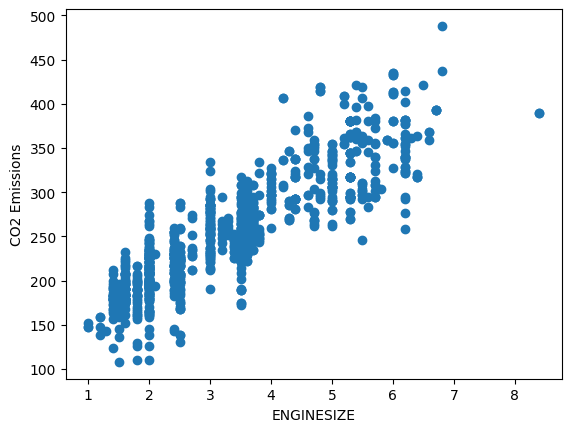

In [6]:
plt.scatter(x, y)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2 Emissions')
plt.show()

In [10]:
X = np.vander(x, 2, increasing=True)
w = np.linalg.lstsq(X, y, rcond=False)[0]
w

array([125.3040995 ,  39.12519979])

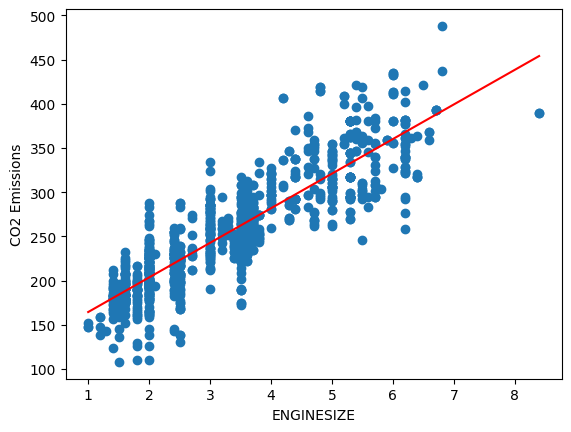

In [11]:
x_line = np.linspace(min(x), max(x), 100)
y_line = x_line * w[1] + w[0]
plt.scatter(x, y)
plt.plot(x_line, y_line, color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2 Emissions')
plt.show()

Other way and have the furmula from base

In [12]:
X = np.vander(x, 2, increasing=True)
w = np.linalg.inv(X.T @ X) @ np.dot(X.T, y)
print(w)

[125.3040995   39.12519979]


Use gradient decent

In [13]:
X = X[:300]
y = y[:300]

In [14]:
w = np.array([0.0, 0.0])
iter = 100
lr = 0.01

for i in range(iter):
    dx = -2 * (y -  (np.dot(w, X.T))) @ X
    w -= lr * dx

print(w)

[-1.88158252e+198 -7.74980314e+198]
